In [2]:
# First: read the geotiff image with GDAL.
from osgeo import gdal, osr

gdal.UseExceptions()


fname = '/notebooks/resources/T22KHG_20190425T132241_TCI_smaller.tif'

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print(inproj)

PROJCS["WGS 84 / UTM zone 22S",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-51],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",10000000],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32722"]]


In [3]:
# Second: convert the WKT projection information to a cartopy projection.
import cartopy.crs as ccrs



projcs = inproj.GetAuthorityCode('PROJCS')
print(projcs)
# projection = ccrs.epsg('3857')
projection = ccrs.epsg(projcs)
print(projection)

32722
_EPSGProjection(32722)


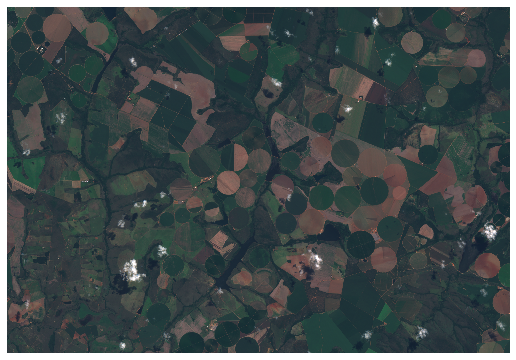

In [4]:
# Third (and last): the figure.
import matplotlib.pyplot as plt
%matplotlib inline

subplot_kw = dict(projection=projection)
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
          gt[3] + ds.RasterYSize * gt[5], gt[3])

img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent, origin='upper')

In [6]:
print(ds.RasterXSize)

2452


In [ ]:
# # First: read the geotiff image with GDAL.
# from osgeo import gdal, osr

# gdal.UseExceptions()


# fname = 'T22KHG_20190425T132241_TCI_smaller.tif'

# ds = gdal.Open(fname)
# data = ds.ReadAsArray()
# gt = ds.GetGeoTransform()
# proj = ds.GetProjection()

# inproj = osr.SpatialReference()
# inproj.ImportFromWkt(proj)

# print(inproj)

# # Second: convert the WKT projection information to a cartopy projection.
# import cartopy.crs as ccrs



# projcs = inproj.GetAuthorityCode('PROJCS')
# print(projcs)
# # projection = ccrs.epsg('3857')
# projection = ccrs.epsg(projcs)
# print(projection)

# # Third (and last): the figure.
# import matplotlib.pyplot as plt
# %matplotlib inline

# subplot_kw = dict(projection=projection)
# fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=subplot_kw)

# extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
#           gt[3] + ds.RasterYSize * gt[5], gt[3])

# img = ax.imshow(data[:3, :, :].transpose((1, 2, 0)), extent=extent, origin='upper')